## Fuzzy Project
## Predict Cardiovascular Disease Risk

### Team Members
- I Gede Krisna Ganesha Widhiarta (NIM: 103012300088)
- I Putu Justine Budi Wijaya (NIM: 103012300361)
- Ziyad Fathir Al Biaroza (NIM: 103012300455)

### Sneak Peek of the Code
Our team has decided to built this Cardiovascular Disease Risk Detection using Fuzzy Logic containing:
1. Input Variable: 
   - Age (Numeric, Classified by: Young, Adult, Old), 
   - Chest Pain Type (Categorical, Classified by: Type 0, Type 1, Type 2, Type 3), 
   - Blood Pressure (Numeric, Classified by: Low, Normal, High), 
   - Cholesterol (Numeric, Classified by: Minimal, Medium, Extreme), 
   - Maximum Heart Rate (Numeric, Classified by: Slight, Moderate, Significant)
2. Output Variable: 
   - Risk (Classified by: Mild, Noticeable, Severe) 

`1. Import Required Library`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

`2. Read CSV Dataset using Pandas`

In [2]:
# Convert CSV file into DataFrame (A Table-Like Structure for Data)
dataframe = pd.read_csv('heart.csv')
print(dataframe.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


`3. Clean & Normalize the DataFrame`

In [3]:
# Lets create the normalizer function
def normalizer(data):
    """
    Normalize the data to the range [0, 1].
    """
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

In [4]:
# Now we need to extract the column we need for the input variables
# Let's say we want to visualize the 'age', 'cholesterol', 'max_heart_rate', chest_pain_type', 'blood_pressure', and 'target' columns
input_age = dataframe['age'].values
input_chol = dataframe['chol'].values
input_thalach = dataframe['thalach'].values
input_cp = dataframe['cp'].values
input_trestbps = dataframe['trestbps'].values

# Combine the input columns into a single DataFrame
input_data = pd.DataFrame({
    'age': input_age,
    'cholesterol': input_chol,
    'max_heart_rate': input_thalach,
    'chest_pain_type': input_cp,
    'blood_pressure': input_trestbps
})
print(f"Input Data: \n{input_data[:5]}\n")  # Print the first 5 rows of input data

# Extract the target data
output_target = dataframe['target'].values
output_data = pd.DataFrame({
    'target': output_target
})
print(f"Output Data: \n{output_data[:5]}\n")  # Print the first 5 rows of output data

# Normalize the input data
normalized_input_data = normalizer(input_data.values)
print(f"Normalized Input Data: \n{normalized_input_data[:5]}") 

Input Data: 
   age  cholesterol  max_heart_rate  chest_pain_type  blood_pressure
0   52          212             168                0             125
1   53          203             155                0             140
2   70          174             125                0             145
3   61          203             161                0             148
4   62          294             106                0             138

Output Data: 
   target
0       0
1       0
2       0
3       0
4       0

Normalized Input Data: 
[[0.47916667 0.19634703 0.74045802 0.         0.29245283]
 [0.5        0.17579909 0.64122137 0.         0.43396226]
 [0.85416667 0.10958904 0.41221374 0.         0.48113208]
 [0.66666667 0.17579909 0.6870229  0.         0.50943396]
 [0.6875     0.38356164 0.26717557 0.         0.41509434]]


`4. The MEMBERSHIP (Function) GOAT!`

In [5]:
# Let's create the triangle membership function
def triangle_membership(x, a, b, c):
    return np.maximum(np.minimum((x - a)/(b - a), (c - x)/(c - b)), 0)

# Let's create the generate membership functions
def generate_triangle_membership(x, low="Low", medium="Medium", high="High"):
    return {
        low: triangle_membership(x, 0.0, 0.0, 0.4),
        medium: triangle_membership(x, 0.3, 0.5, 0.7),
        high: triangle_membership(x, 0.6, 1.0, 1.0),
    }

In [6]:
x = np.linspace(0, 1, 100)
# Generate membership values for the triangle function
# Minus the chest pain type as it is categorical
features = ['age', 'cholesterol', 'max_heart_rate', 'blood_pressure']
age = generate_triangle_membership(x, low="Young", medium="Adult", high="Old")
chol = generate_triangle_membership(x, low="Minimal", medium="Medium", high="Extreme")
thalach = generate_triangle_membership(x, low="Slight", medium="Moderate", high="Significant")
trestbps = generate_triangle_membership(x, low="Low", medium="Normal", high="High")

C:\Users\I Gede Krisna Ganesh\AppData\Local\Temp\ipykernel_13472\2575697453.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.maximum(np.minimum((x - a)/(b - a), (c - x)/(c - b)), 0)
C:\Users\I Gede Krisna Ganesh\AppData\Local\Temp\ipykernel_13472\2575697453.py:3: RuntimeWarning: invalid value encountered in divide
  return np.maximum(np.minimum((x - a)/(b - a), (c - x)/(c - b)), 0)


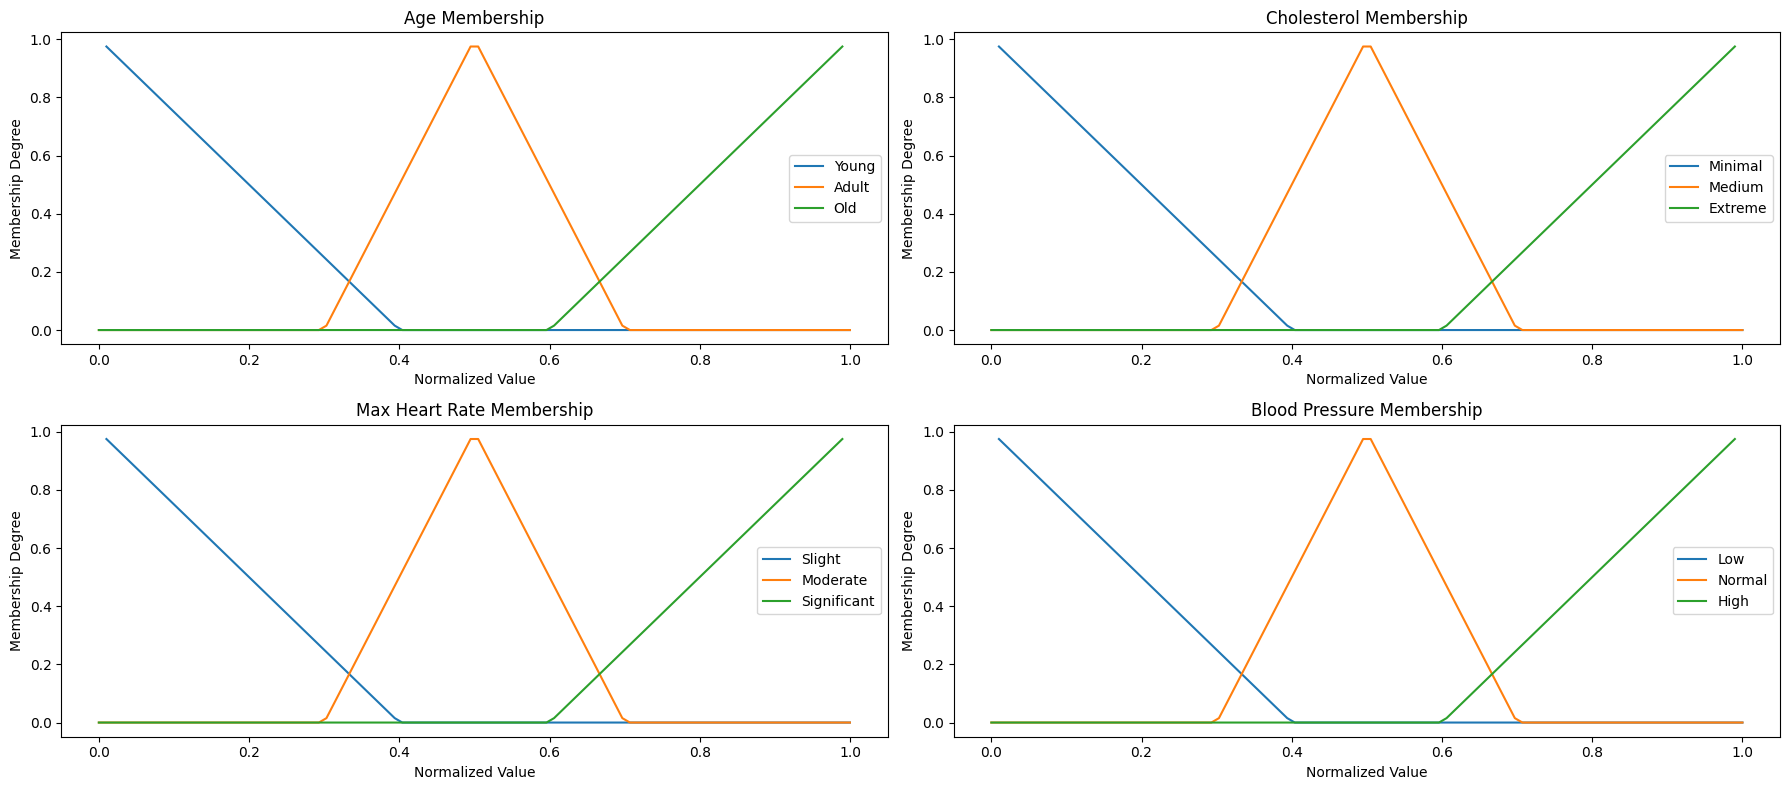

In [7]:
# Visualize the membership functions using matplotlib.pyplot
fig, ax = plt.subplots(2, 2, figsize=(18, 8))
ax.flatten()
def plot_membership(ax, x, membership, title):
    for label, values in membership.items():
        ax.plot(x, values, label=label)
    ax.set_title(f"{title} Membership")
    ax.set_xlabel('Normalized Value')
    ax.set_ylabel('Membership Degree')
    ax.legend()

plot_membership(ax[0, 0], x, age, 'Age')
plot_membership(ax[0, 1], x, chol, 'Cholesterol')
plot_membership(ax[1, 0], x, thalach, 'Max Heart Rate')
plot_membership(ax[1, 1], x, trestbps, 'Blood Pressure')
plt.tight_layout()
plt.show()